In [1]:
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import numpy as np
import torch
import scipy

In [2]:
liger = pd.read_csv("AML7_MERGED_LIGER_ATAC_TSNE.csv")

In [2]:
projected_all = np.loadtxt("figures/final_data/AML7_projected_all.txt")
xy_all = np.loadtxt("figures/final_data/AML7_xy_all.txt")
filtered_types = pd.read_csv("figures/final_data/AML7_types.csv")
unfiltered_types = pd.read_csv("figures/final_data/AML7_types_unfiltered.csv")

In [4]:
types = np.asarray(filtered_types['0'])

In [37]:
keep=[]
for i in range(genescores_ori.T.shape[0]):
    if genescores_ori.columns[i] not in drop_cells:
        keep.append(i)
        
origin=[]
for i in liger["Unnamed: 0"][keep]:
    if "BM" in i:
        origin.append("BM")
    else:
        origin.append("AML")

/home/lf2684/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


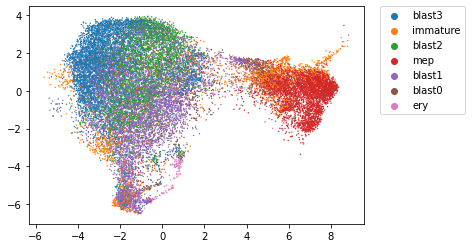

In [38]:
randomize=np.arange(len(types))
np.random.shuffle(randomize)
sns.scatterplot(np.asarray(liger.iloc[keep]["X0"])[randomize],
                np.asarray(liger.iloc[keep]["X1"])[randomize],hue=types[randomize],s=2,linewidth=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.savefig("figures/AML7_LIGER_ATAC.eps",format='eps',bbox_inches="tight")

/home/lf2684/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


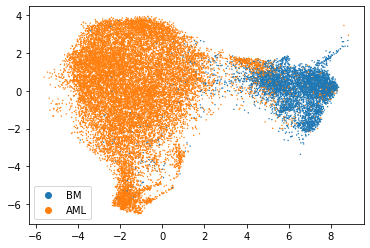

In [39]:
randomize=np.arange(len(types))
np.random.shuffle(randomize)
sns.scatterplot(np.asarray(liger.iloc[keep]["X0"])[randomize],
                np.asarray(liger.iloc[keep]["X1"])[randomize],
                hue=np.asarray(origin)[randomize],s=2,linewidth=0)
plt.savefig("figures/AML7_LIGER_ATAC_origin.eps",format='eps',bbox_inches="tight")

/home/lf2684/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


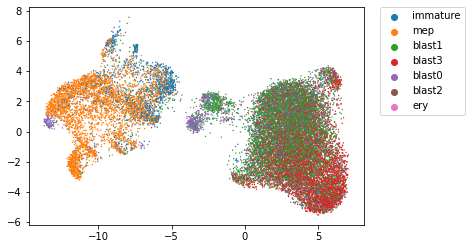

In [40]:
sns.scatterplot(atac.obsm["UMAP"][:,0][randomize],
                atac.obsm["UMAP"][:,1][randomize],
                hue=types[randomize],s=2,linewidth=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.savefig("figures/AML7_ATACSPACE.eps",format='eps',bbox_inches="tight")

/home/lf2684/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


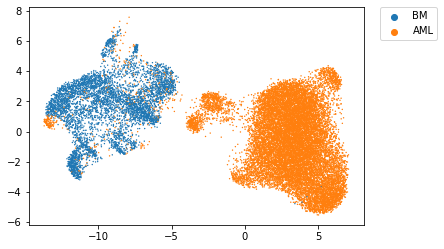

In [41]:
sns.scatterplot(atac.obsm["UMAP"][:,0][randomize],
                atac.obsm["UMAP"][:,1][randomize],
                hue=np.asarray(origin)[randomize],s=2,linewidth=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.savefig("figures/AML7_ATACSPACE_origin.eps",format='eps',bbox_inches="tight")

In [5]:
genescores_ori=pd.read_csv("MERGED_PEER/AML7_MERGE_all_cells_gene_scores.csv",index_col=0)

In [2]:
atac = sc.read("AML7_MERGE_ATAC.h5ad")

In [7]:
H = pd.read_csv("AML7_MERGED_LIGER_H.norm.csv",index_col=0)

In [3]:
rna = sc.read_h5ad("tet2_p3_healthy.data.PROCESSSED.30.h5ad")

In [4]:
smoothed_genes = pd.read_csv("smoothed_genes_AML7merged.csv")

In [5]:
sc.pp.calculate_qc_metrics(rna, inplace=True)

# UPDATE OBS WITH USE

# store the current 'total_counts' under original_total_counts, which will not automatically be updated
# by scanpy in subsequent filtering steps
rna.obs['original_total_counts'] = rna.obs['total_counts']

# log10 original library size
rna.obs['log10_original_total_counts'] = np.log10(rna.obs['original_total_counts'])
med = np.median(rna.obs['original_total_counts'])
sc.pp.normalize_per_cell(rna, counts_per_cell_after = med)

#log transform + 1 and updates adata.X
sc.pp.log1p(rna)

/home/lf2684/anaconda3/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [6]:
#borrowing genes from original data object since some important ones were filtered out
orig_rna = sc.read_h5ad('AML7_allsorted_cleaned-Copy1.h5')
bm = sc.read_h5ad("BM_2019_01_10-Copy1.h5")

orig_rna = orig_rna.concatenate(bm)
sc.pp.calculate_qc_metrics(orig_rna, inplace=True)

# UPDATE OBS WITH USE

# store the current 'total_counts' under original_total_counts, which will not automatically be updated
# by scanpy in subsequent filtering steps
orig_rna.obs['original_total_counts'] = orig_rna.obs['total_counts']

# log10 original library size
orig_rna.obs['log10_original_total_counts'] = np.log10(orig_rna.obs['original_total_counts'])
med = np.median(orig_rna.obs['original_total_counts'])
sc.pp.normalize_per_cell(orig_rna, counts_per_cell_after = med)

#log transform + 1 and updates adata.X
sc.pp.log1p(orig_rna)


#match cells to Decipher RNA object so we can share the v-space
orig_values = orig_rna.to_df().loc[rna.obs_names]
orig_rna = orig_rna[rna.obs_names]

/home/lf2684/anaconda3/lib/python3.8/site-packages/anndata/compat/__init__.py:179: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(
/home/lf2684/anaconda3/lib/python3.8/site-packages/anndata/compat/__init__.py:179: FutureWarning: Moving element from .uns['neighbors']['connectivities'] to .obsp['connectivities'].

This is where adjacency matrices should go now.
  warn(
/home/lf2684/anaconda3/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
/home/lf2684/anaconda3/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [12]:
orig_rna.obsm["latent_p_corrected"] = rna.obsm["latent_p_corrected"]
motifs = ["FOSL1","HOXB4","HOXB6","GATA2","MYC","NR4A2","MAFF","ATF3","NFKB","RELB","KLF2","ZNF274","STAT1","IRF1","CD34","PROM1","MEIS1","HOXB3"]



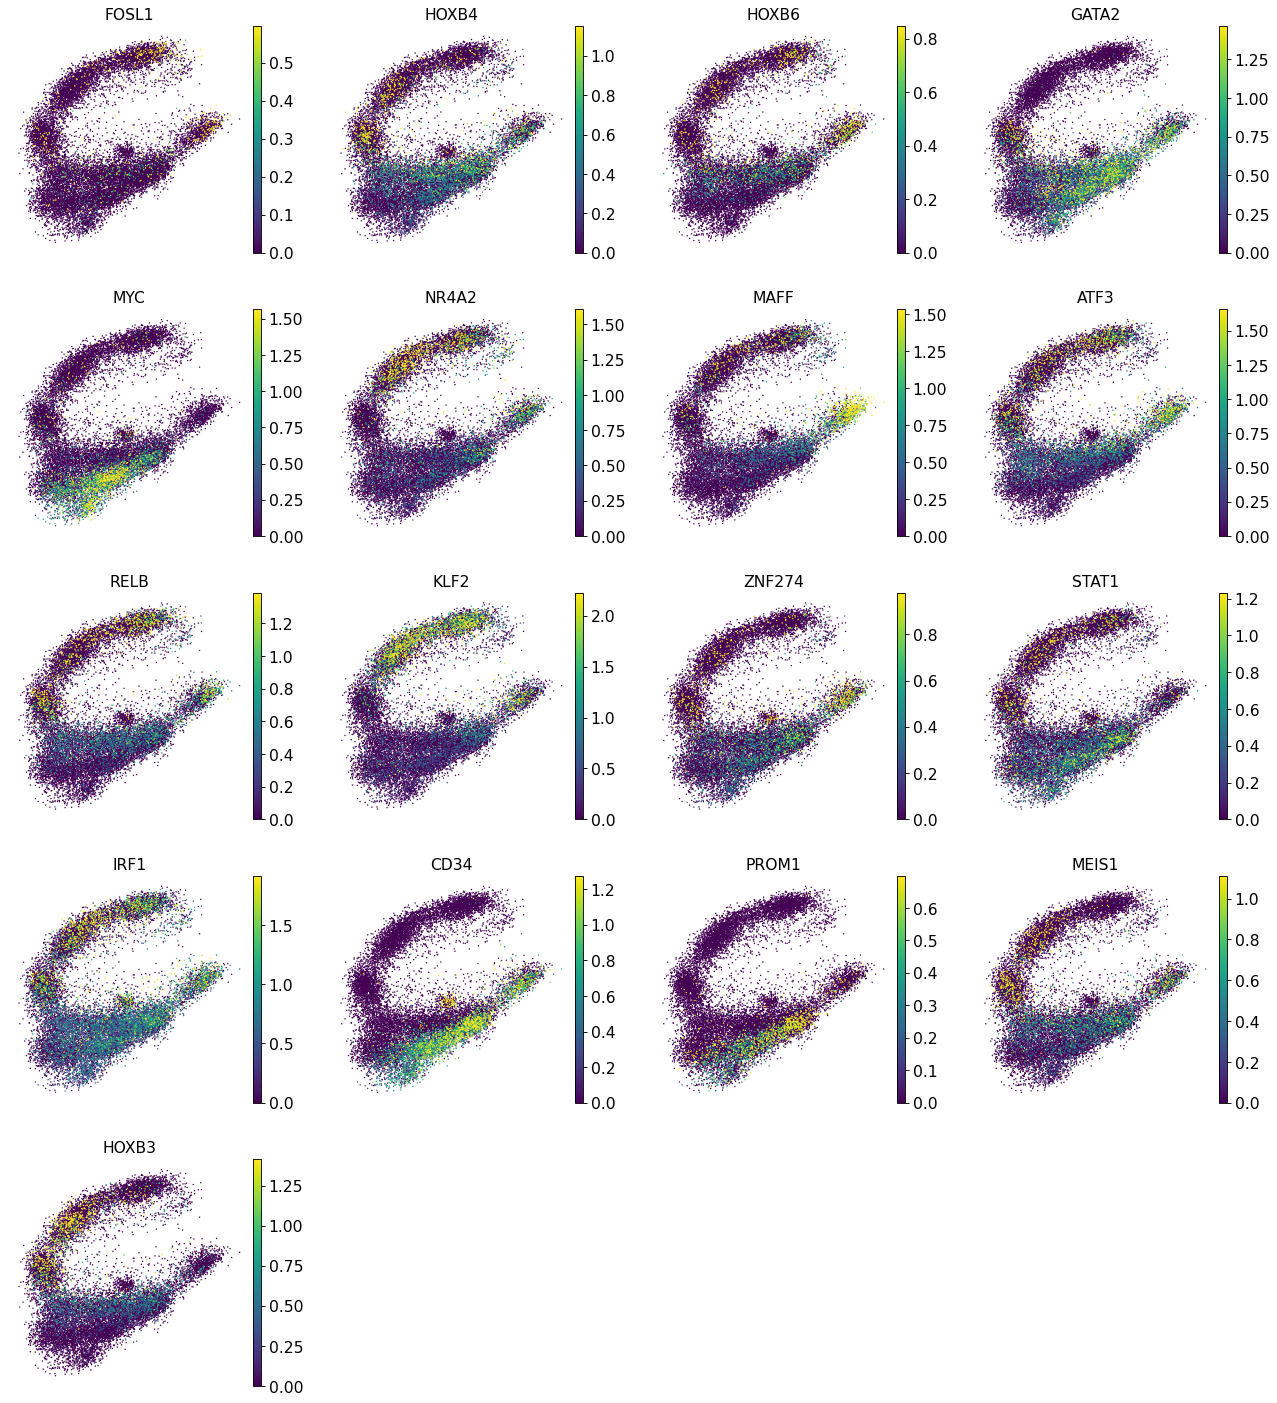

In [13]:
sc.set_figure_params(vector_friendly=True)
sc.pl.embedding(
            orig_rna,
            basis="latent_p_corrected",
            frameon=False,
            color=[i for i in motifs if i in orig_rna.var_names],vmax='p98',vmin='p2',
            save="AML3_RNA_motifs.pdf"
        )

In [1]:
#now back to Decipher RNA object for rest of analysis

In [11]:
genescores = genescores_ori.T

In [12]:
for i in range(len(genescores.index)):
    if "BM" not in genescores.index[i]:
        print(i)
        break

5267


In [13]:
for i in range(len(rna.obs_names)):
    if "BM" in rna.obs_names[i]:
        print(i)
        break

12000


In [14]:
bm_atac = genescores.iloc[0:5267]
p_atac = genescores.iloc[5267:]
p_rna = rna[0:12000,:]
bm_rna = rna[12000:,:]

/home/lf2684/anaconda3/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [ ]:
smoothed_genes.to_csv("smoothed_genes_AML7merged.csv")

In [107]:
atac.obsm['UMAP'] = pd.read_csv('MERGED_PEER/AML7_MERGE_umap.csv', index_col=0).loc[atac.obs_names, :].values

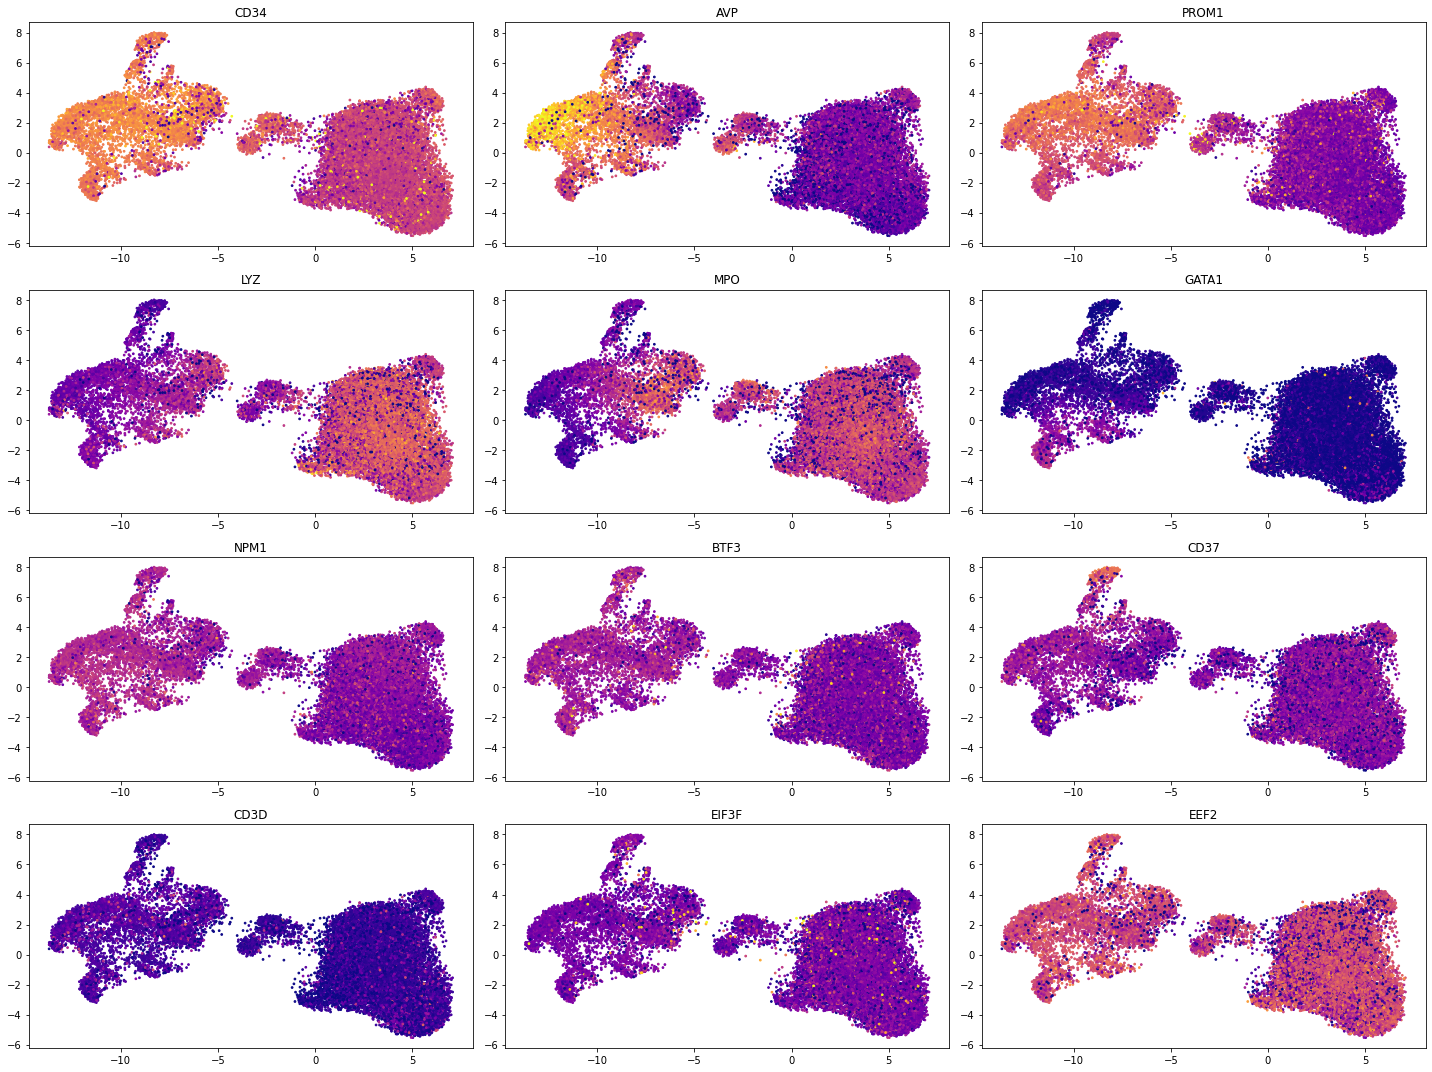

In [19]:
import scipy
genes = ["CD34","AVP","PROM1","LYZ","MPO","GATA1","NPM1",'BTF3', 'CD37', "CD3D",'EIF3F', 'EEF2']

fig,axs = plt.subplots(4,3,figsize=(20,15))
for i in range(len(genes)):
    axs[i//3][i%3].scatter(atac.obsm["UMAP"][:,0],atac.obsm["UMAP"][:,1],s=3,
                           c=np.log2(smoothed_genes[genes[i]]+1),
                           cmap='plasma',vmax=1.5)
    axs[i//3][i%3].set_title(genes[i])
plt.tight_layout()

/home/lf2684/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


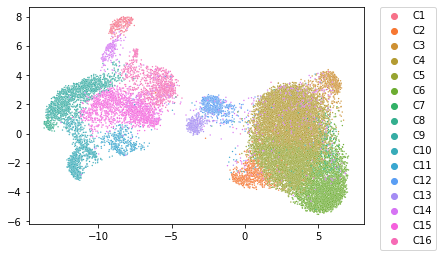

In [15]:
import seaborn as sns
sns.scatterplot(atac.obsm["UMAP"][:,0],atac.obsm["UMAP"][:,1],hue=atac.obs["LSI_Clusters"],s=2)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

/home/lf2684/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


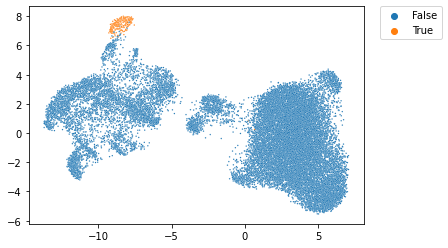

In [15]:
import seaborn as sns
clusters = ["C1"]
cluster_in =[i in clusters for i in atac.obs["LSI_Clusters"]]
sns.scatterplot(atac.obsm["UMAP"][:,0],atac.obsm["UMAP"][:,1],hue=cluster_in,s=2)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

In [16]:
#remove immune
drop_cells=[]
inds = []
for i in range(atac.shape[0]):
    if atac.obs["LSI_Clusters"][i] in clusters:
        drop_cells.append(atac.obs_names[i])
        
    else:
        inds.append(i)

In [17]:
atac = atac[inds,:]

/home/lf2684/anaconda3/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [18]:
keep=[]
for i in bm_atac.index:
    if i not in drop_cells:
        keep.append(i)
bm_atac = bm_atac.loc[keep]

In [19]:
keep=[]
for i in p_atac.index:
    if i not in drop_cells:
        keep.append(i)
p_atac = p_atac.loc[keep]

In [20]:
drop_cells_rna=[]
inds = []
for i in range(rna.shape[0]):
    if rna.obs["cell_type_merged"][i]=='lympho':
        drop_cells_rna.append(rna.obs_names[i])
    else:
        inds.append(i)

In [21]:
rna = rna[inds,:]

In [22]:
drop_cells_new = []
for i in drop_cells:
    if "AML7" in i:
        tmp=i.replace("#",".").replace("_",".").replace("-",".")
        drop_cells_new.append(i.split("#")[0]+"."+tmp.split(".")[2]+".1")
    else:
        drop_cells_new.append(i.replace("#",".").replace("_",".").replace("-","."))

In [23]:
drop_cells_new = drop_cells_new+drop_cells_rna

In [24]:
H = H.drop(drop_cells_new)

In [25]:
for i in range(rna.shape[0]):
    if "BM" in rna.obs_names[i]:
        print(i)
        break

12000


In [26]:
p_rna = rna[0:12000,:]
bm_rna = rna[12000:,:]

In [27]:
bm_inds = []
p_inds = []
for i in range(len(H.index)):
    if "BM" in H.index[i]:
        bm_inds.append(H.index[i])
    else:
        p_inds.append(H.index[i])
        
H_bm = H.drop(p_inds)
H_p = H.drop(bm_inds)

In [28]:
genescores = genescores.drop(drop_cells)

In [50]:
def pairwise_euclids(coords):
    dists = []
    for i in range(coords.shape[0]):
        for j in range(coords.shape[0]):
            if i!=j:
                #print(i,j)
                dists.append(scipy.spatial.distance.euclidean(coords[i,:], coords[j,:]))
    return np.unique(dists)

H_p_atac = H_p.iloc[0:p_atac.shape[0],:]

H_p_rna = H_p.iloc[p_atac.shape[0]:,:]

from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=3, radius=0.2)
#train classifier on dataset of RNA
neigh.fit(H_p_rna)

import scipy
p_rna_df = p_rna.obs
p_projected = []
p_types = []
p_xy = []
drop_atac_cells = []
dists_p=[]
dists_p_euclid=[]

for i in range(H_p_atac.shape[0]):
    neighbors = neigh.kneighbors([H_p_atac.iloc[i,:]])[1][0]
    rna_inds = list(H_p_rna.index[neighbors])
    #check to see if assigned neighbors are too far away from each other:
    dist = max(pairwise_euclids(p_rna.obsm["latent_p_corrected"][neighbors,:]))
    dists_p.append(dist)
    p_projected.append(np.mean(p_rna_df.loc[rna_inds]["trajectory_projection"]))
    p_xy.append(np.mean(p_rna.obsm["latent_p_corrected"][neighbors,:],axis=0))
    #assign type to the neighbor that is closest
    p_types.append(scipy.stats.mode(p_rna_df.loc[rna_inds]["cell_type_merged"])[0])

In [51]:
H_bm_atac = H_bm.iloc[0:bm_atac.shape[0],:]

H_bm_rna = H_bm.iloc[bm_atac.shape[0]:,:]

from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=3, radius=0.2)
#train classifier on dataset of RNA
neigh.fit(H_bm_rna)

import scipy
bm_rna_df = bm_rna.obs
bm_projected = []
bm_types = []
bm_xy = []
drop_atac_cells_bm = []
dists_bm = []
dists_bm_euclid = []
for i in range(H_bm_atac.shape[0]):
    neighbors = neigh.kneighbors([H_bm_atac.iloc[i,:]])[1][0]
    rna_inds = list(H_bm_rna.index[neighbors])
    #check to see if assigned neighbors are too far away from each other:
    dist = max(pairwise_euclids(bm_rna.obsm["latent_p_corrected"][neighbors,:]))
    dists_bm.append(dist)
    bm_projected.append(np.mean(bm_rna_df.loc[rna_inds]["trajectory_projection"]))
    bm_xy.append(np.mean(bm_rna.obsm["latent_p_corrected"][neighbors,:],axis=0))
    bm_types.append(scipy.stats.mode(bm_rna_df.loc[rna_inds]["cell_type_merged"])[0])

In [52]:
projected_all = np.concatenate((bm_projected,p_projected))

In [53]:
xy_all = np.concatenate((bm_xy,p_xy))

In [56]:
smoothed_genes.to_csv("smoothed_genes_AML7merged.csv")

In [54]:
smoothed_genes = pd.read_csv('smoothed_genes_AML7merged.csv')

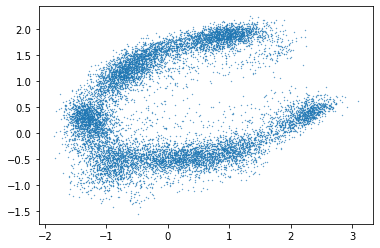

In [89]:
plt.scatter(p_rna.obsm["latent_p_corrected"][:,0],p_rna.obsm["latent_p_corrected"][:,1],s=.1)

In [57]:
dists = np.concatenate([dists_bm,dists_p])

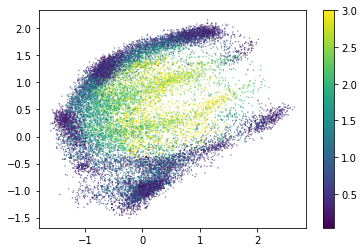

In [58]:
plt.scatter(xy_all[:,0],xy_all[:,1],s=.1, c=dists, vmax=3)
plt.colorbar()

In [59]:
#filter out noisily projected cells
filters = []
for i in range(len(dists)):
    if dists[i]<1.3:
        filters.append(i)

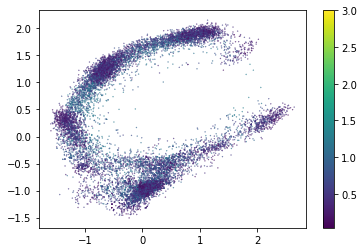

In [60]:
plt.scatter(xy_all[filters,0],xy_all[filters,1],s=.1, c=dists[filters], vmax=3)
plt.colorbar()

In [61]:
smoothed_genes = smoothed_genes.iloc[filters,:]

IndexError: positional indexers are out-of-bounds

In [65]:
filtered_bm_inds = [i for i in smoothed_genes["Unnamed: 0.1"] if "BM" in i]
filtered_p_inds = [i for i in smoothed_genes["Unnamed: 0.1"] if "AML7" in i]

bm_projected = pd.DataFrame(bm_projected)
bm_projected.index = bm_atac.index

bm_projected = bm_projected.loc[filtered_bm_inds]

bm_atac = bm_atac.loc[filtered_bm_inds]

p_projected = pd.DataFrame(p_projected)
p_projected.index = p_atac.index

p_projected = p_projected.loc[filtered_p_inds]

p_atac = p_atac.loc[filtered_p_inds]

In [62]:
xy_all = xy_all[filters,:]
projected_all = projected_all[filters]

In [66]:
bm_projected.to_csv("AML7_filtered_bm_projected.csv")
p_projected.to_csv("AML7_filtered_p_projected.csv")
bm_atac.to_csv("AML7_filtered_bm_atac.csv")
p_atac.to_csv("AML7_filtered_p_atac.csv")

In [29]:
bm_projected = pd.read_csv("AML7_filtered_bm_projected.csv")
p_projected = pd.read_csv("AML7_filtered_p_projected.csv")
bm_atac= pd.read_csv("AML7_filtered_bm_atac.csv")
p_atac= pd.read_csv("AML7_filtered_p_atac.csv")

In [30]:
bm_projected = bm_projected['0']
p_projected = p_projected['0']

In [11]:
#create AnnData object using smoothed accessibility and projected coordinates
smoothed_genes.index = smoothed_genes["Unnamed: 0.1.1"]

smoothed_genes = smoothed_genes.drop("Unnamed: 0.1.1",axis=1)
smoothed_genes = smoothed_genes.drop("Unnamed: 0.1",axis=1)

atac_ad = sc.AnnData(smoothed_genes)
atac_ad.obsm["decipher_rna_p"] = xy_all

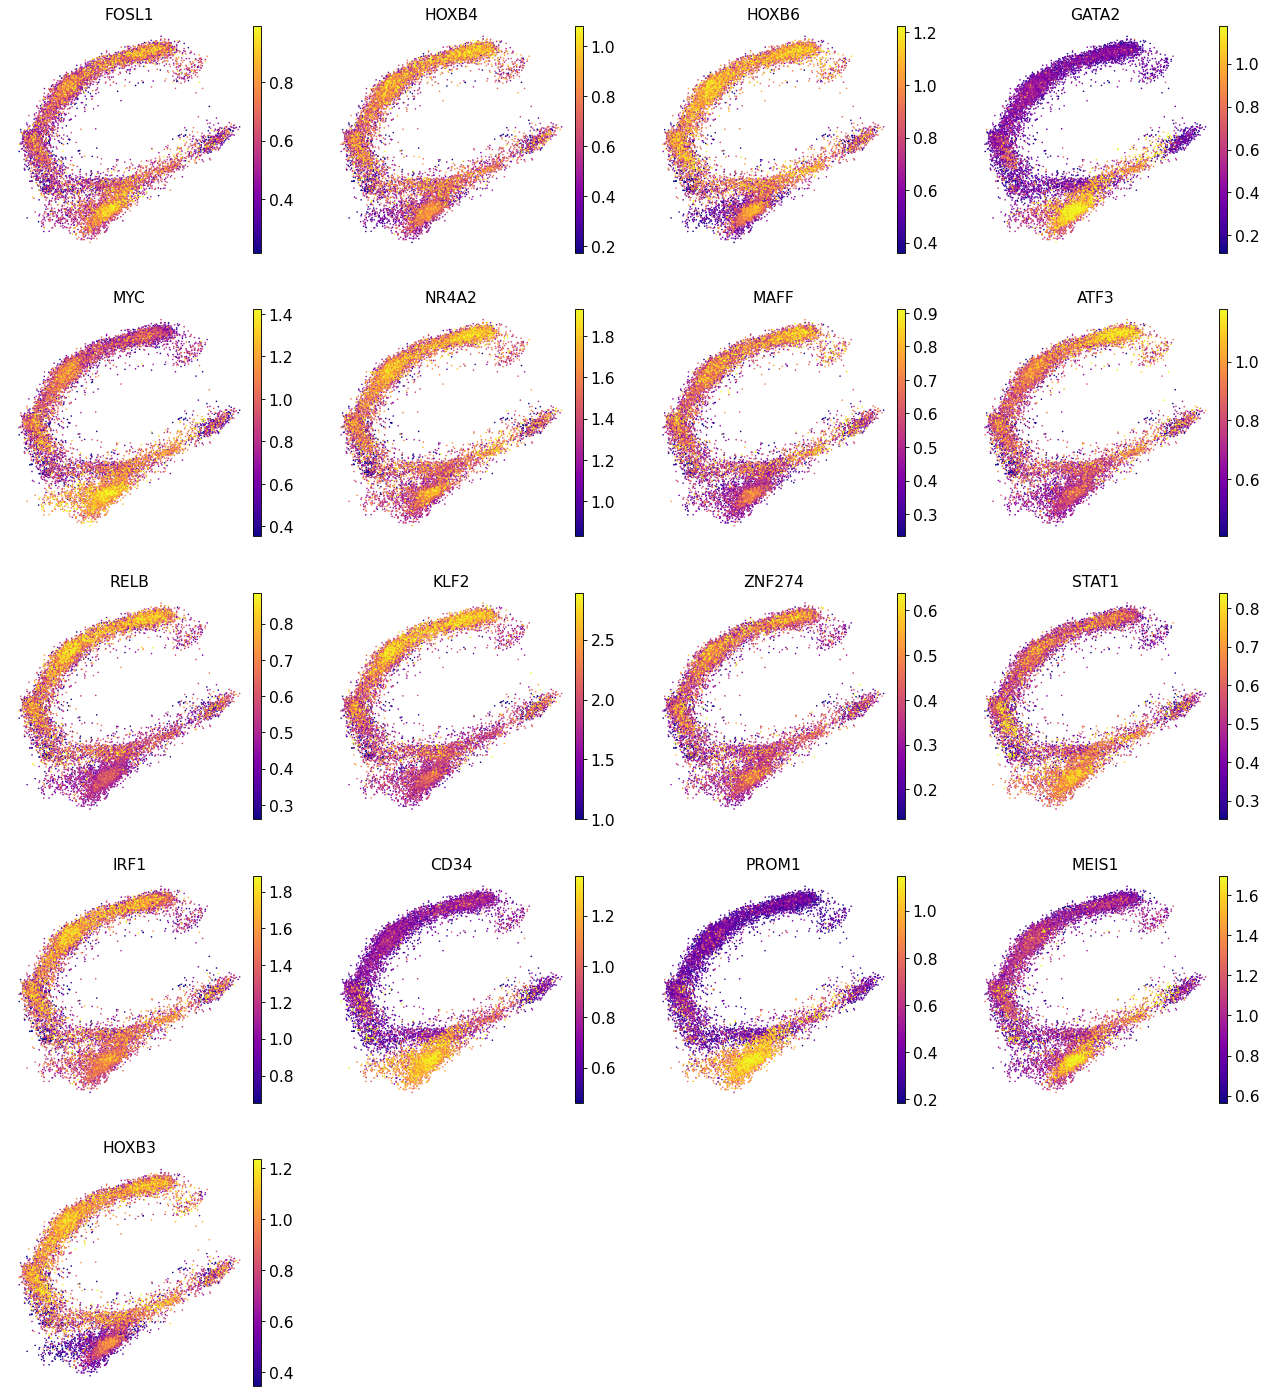

In [18]:
sc.pl.embedding(
            atac_ad,
            basis="decipher_rna_p",
            frameon=False,
            color=[i for i in motifs if i in orig_rna.var_names],vmax='p98.5',vmin='p5',cmap='plasma',
            save="AML3_ATAC_motifs.pdf"
        )

In [ ]:
fig,axs = plt.subplots(14,5,figsize=(20,35))
for i in range(len(tfs)):
    axs[i//5][i%5].scatter(xy_all[:,0],xy_all[:,1],s=3,
                           c=np.log2(smoothed_genes[tfs[i]]+1),
                           cmap='plasma',vmax=1.5)
    axs[i//5][i%5].set_title(tfs[i])
plt.tight_layout()
plt.savefig("figures/Decipher_space_smoothed_tfs.eps",format="eps")

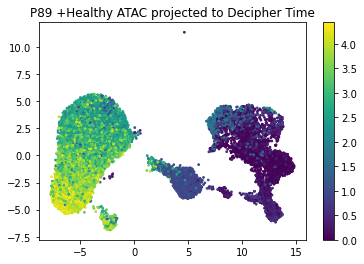

In [42]:
plt.scatter(atac.obsm["UMAP"][:,0],atac.obsm["UMAP"][:,1],s=3,c=projected_all)
plt.title("P89 +Healthy ATAC projected to Decipher Time")
plt.colorbar()
plt.savefig("figures/projection_to_decipher_time.eps",format="eps")

In [47]:
types_p = [i[0] for i in p_types]

In [48]:
flat_bm_types = []
for i in range(len(bm_projected)):
    if np.isnan(bm_projected[i])==False:
        flat_bm_types.append(bm_types[i][0])
    else:
        flat_bm_types.append("NA")

In [49]:
types = np.concatenate((flat_bm_types,types_p))
pd.DataFrame(types).to_csv("figures/final_data/AML7_types_unfiltered.csv")

In [50]:
types = types[filters]

/home/lf2684/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


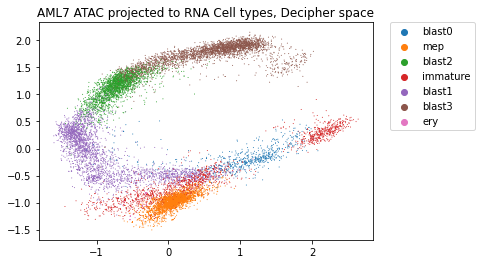

In [45]:
randomize=np.arange(len(types))
np.random.shuffle(randomize)

sns.scatterplot(xy_all[:,0][randomize],xy_all[:,1][randomize],hue=types[randomize],s=1,linewidth=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.title("AML7 ATAC projected to RNA Cell types, Decipher space")
plt.savefig("figures/AML7_Decipher_space_celltypes.eps",format="eps",bbox_inches='tight')

In [31]:
xy_all.shape

(14318, 2)

In [32]:
types.shape

(14318,)

In [33]:
from scipy import interpolate
from scipy import ndimage

def gaussian_smooth(x, bin_means):
    x_sm = np.mean(x,axis=1)
    y_sm = np.asarray(bin_means)

    #spl = interpolate.UnivariateSpline(x_sm, y_sm)

    sigma = 2
    x_g1d = ndimage.gaussian_filter1d(x_sm, sigma)
    y_g1d = ndimage.gaussian_filter1d(y_sm, sigma)

    return x_g1d, y_g1d
